TECNICAS DE VALIDACION DE MODELOS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = sns.load_dataset('penguins')
df.dropna(inplace=True)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
X = pd.get_dummies(df.drop('body_mass_g', axis=1))
y = df['body_mass_g']

train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"train: {X_train.shape}, {y_train.shape}")
print(f"test: {X_test.shape}, {y_test.shape}")

train: (266, 11), (266,)
test: (67, 11), (67,)


cross_val_score


Validación cruzada, dividir los datos en k partes para entrenar y validar múltiples veces

In [5]:
from sklearn.model_selection import cross_val_score

# neg_mean_absolute_error es la MAE pero en negativo para cumplir la convención de "mayor es mejor"
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[-220.38144928 -249.60757207 -285.90470845 -245.47929014 -181.47689761]
mean: -236.56998351139936, std: 34.58492822017874


<Axes: >

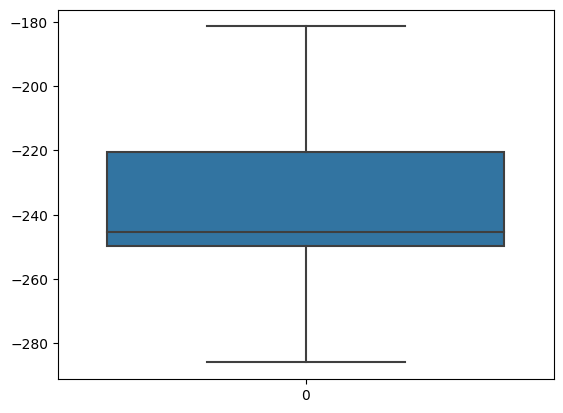

In [6]:
sns.boxplot(data=cv_results)

In [7]:
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[ -80190.73603549  -97691.86526981 -114758.81969422  -93803.50773163
  -54055.18649562]
mean: -88100.02304535349, std: 20282.1711376941


train_test_split TEST

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"train: {X_train.shape}, {y_train.shape}")
print(f"test: {X_test.shape}, {y_test.shape}")

train: (266, 11), (266,)
test: (67, 11), (67,)


cross_val_score
Validación cruzada, dividir los datos en k partes para entrenar y validar múltiples veces

In [9]:
from sklearn.model_selection import cross_val_score

# neg_mean_absolute_error es la MAE pero en negativo para cumplir la convención de "mayor es mejor"
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[-220.38144928 -249.60757207 -285.90470845 -245.47929014 -181.47689761]
mean: -236.56998351139936, std: 34.58492822017874


<Axes: >

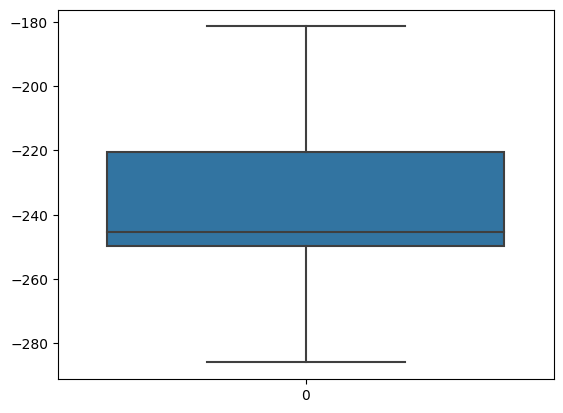

In [10]:
sns.boxplot(data=cv_results)

In [11]:
model = LinearRegression()
cv_results = cross_val_score(model, X, y, scoring='neg_mean_squared_error')
print(cv_results)
print(f"mean: {cv_results.mean()}, std: {cv_results.std()}")

[ -80190.73603549  -97691.86526981 -114758.81969422  -93803.50773163
  -54055.18649562]
mean: -88100.02304535349, std: 20282.1711376941


In [12]:
from sklearn.model_selection import cross_validate

# igual que cross_val_score pero con más información, muestra los tiempos de train (fit_time) y test (score_time)
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error')
cv_results

{'fit_time': array([0.00303149, 0.00151491, 0.00200772, 0.00214052, 0.0017674 ]),
 'score_time': array([0.00100923, 0.00101042, 0.00153637, 0.00156832, 0.00158334]),
 'test_score': array([-220.38144928, -249.60757207, -285.90470845, -245.47929014,
        -181.47689761])}

In [13]:
from sklearn.metrics import SCORERS

sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [14]:
cv_results = cross_validate(model, X, y, scoring='neg_root_mean_squared_error') # RMSE
cv_results

{'fit_time': array([0.0041523 , 0.00100064, 0.00201035, 0.00200915, 0.00099921]),
 'score_time': array([0.0010078 , 0.00150442, 0.00099945, 0.00100064, 0.00150466]),
 'test_score': array([-283.1796886 , -312.55697924, -338.76071156, -306.27358314,
        -232.49771288])}

<Axes: >

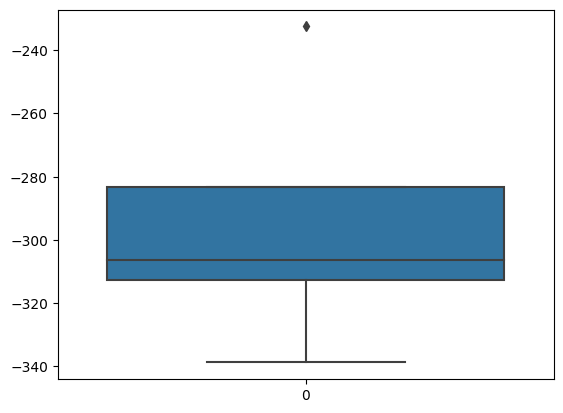

In [15]:
sns.boxplot(data=cv_results['test_score'])

<Axes: >

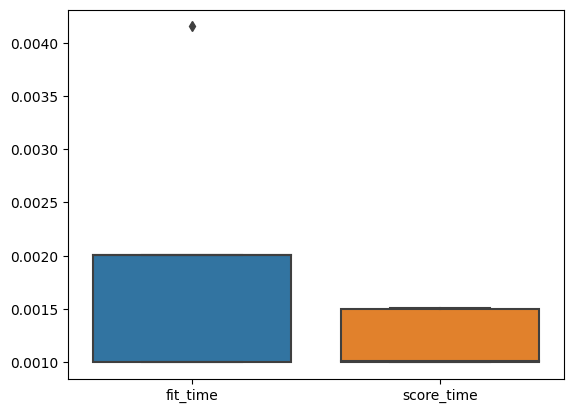

In [16]:
df_results_time = pd.DataFrame(cv_results)[['fit_time', 'score_time']]

sns.boxplot(data=df_results_time)

In [17]:
from sklearn.metrics import make_scorer, mean_absolute_error

# MAE personalizada, para que no esté negada, sería como la MAE normal, cuanto más pequeño el valor mejor
# scorer_mae = make_scorer(mean_absolute_error, greater_is_better=True)
# cv_results = cross_validate(model, X, y, scoring=scorer_mae)
# cv_results

# Calcular MAE normal manualmente
cv_results = cross_validate(model, X, y, scoring='neg_mean_absolute_error')
cv_results['test_score'] = cv_results['test_score'] * -1
cv_results

{'fit_time': array([0.00316691, 0.00304532, 0.00152397, 0.00254369, 0.00101233]),
 'score_time': array([0.0009985 , 0.0011096 , 0.00100064, 0.00137186, 0.00252533]),
 'test_score': array([220.38144928, 249.60757207, 285.90470845, 245.47929014,
        181.47689761])}

train_test_split + cross_val_score + varios modelos

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

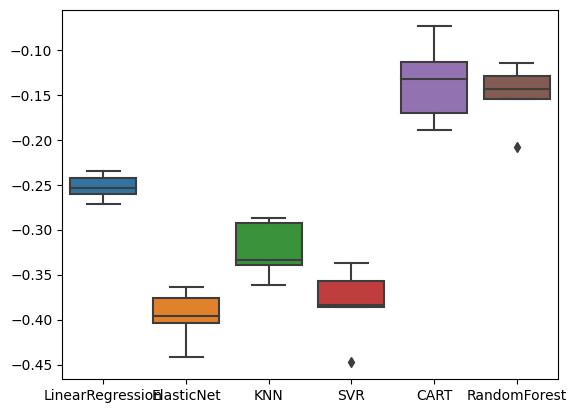

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = [
    ('LinearRegression', LinearRegression()),
    ('ElasticNet', ElasticNet()),
    ('KNN', KNeighborsRegressor(n_neighbors=21)),
    ('SVR', SVR()),
    ('CART', DecisionTreeRegressor()),
    ('RandomForest', RandomForestRegressor())
]

cv_results = []
test_results = []
names = []

for name, model in models: 
    cv_results.append(cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error'))
    names.append(name)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    test_results.append(rmse)

# df_results = pd.DataFrame(results, columns=names)

# plt.boxplot(results);
ax = sns.boxplot(data=cv_results)
ax.set_xticklabels(names);

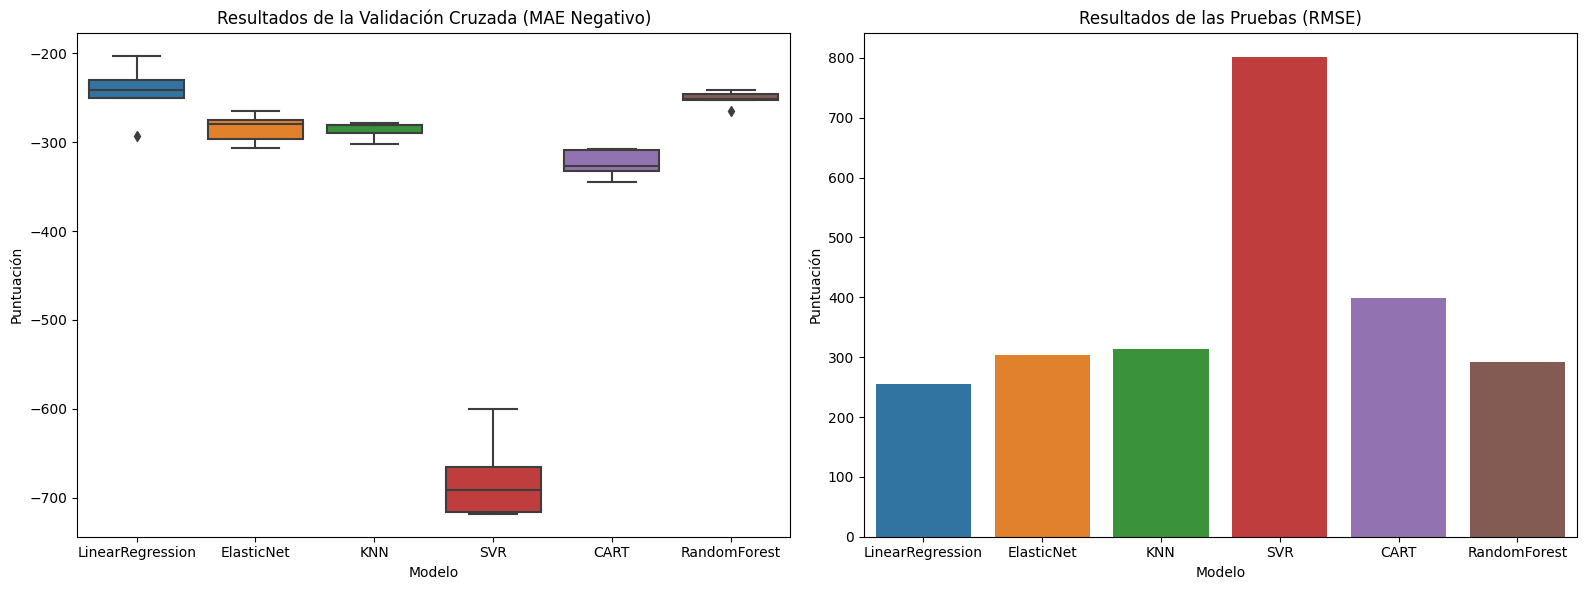

In [20]:
df_cv = pd.DataFrame(cv_results, index=names).T
df_test = pd.DataFrame(test_results, index=names).T

fig, axs = plt.subplots(ncols=2, figsize=(16,6))

sns.boxplot(data=df_cv, ax=axs[0])
axs[0].set_title('Resultados de la Validación Cruzada (MAE Negativo)')
axs[0].set_ylabel('Puntuación')
axs[0].set_xlabel('Modelo')

sns.barplot(data=df_test, ax=axs[1])
axs[1].set_title('Resultados de las Pruebas (RMSE)')
axs[1].set_ylabel('Puntuación')
axs[1].set_xlabel('Modelo')

plt.tight_layout()
plt.show()

CLASIFICACION

* BINARIA SEX
* MULTICLASE ESPECIES

In [21]:
df = sns.load_dataset('penguins').dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [24]:
X = pd.get_dummies(df.drop('sex', axis=1), drop_first=True)
y = df['sex'].map({'Male':0, 'Female':1})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)